# Analisa Kinerja Metode *K-Nearest Neighbor*, Logistic Regression, dan Decision Tree dalam mengklasifikasi pasien berisiko terkena penyakit gagal jantung

* **Nama**: Rizky Aditya
* **Email**: rizky.aditya41119@gmail.com
* **ID Dicoding**: rzad20

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Tahap 1 : Mengimpor Semua Packages / Library yang dibutuhkan


In [2]:
import pandas as pd
import numpy as np

#Untuk Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

#Library yang dibutuhkan untuk proses Machine Learning
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, classification_report,mean_squared_error

## Tahap 2 : Data Loading

In [3]:
#Memasukkan dataset
data_path = '/content/drive/MyDrive/ML_Project_Data/heart.csv'
dataset = pd.read_csv(data_path)
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Tahap 3 - Deksripsi Variabel data dan Penilaian Data

Berdasarkan informasi dari Sumber Dataset, variabel-variabel yang terdapat dalam dataset terkait adalah sebagai berikut :
1. Age : Usia Pasien Dalam Tahun.
2. Sex : Jenis Kelamin Pasien (M : Male/Laki-Laki, F : Female/Perempuan).
3. ChestPainType : Jenis Nyeri dada yang dialami pasien (TA : Angina Tipikal, ATA : Angina Atipikal, NAP : Nyeri Dada Non Anginal, ASY : Asimtomatik).
4. RestingBp : Tekanan darah istirahat pasien dalam satuan mm Hg (milimeter air raksa)
Cholestrol : Kolestrol serum pasien dalam satuan mm/dl.
5. FastingBS : Kadar gula darah puasa pasien [1: Jika FastingBS>120 mg/dl, 0: sebaliknya].
6. RestingECG : Hasil elektrokardiogram istirahat pasien (Normal: Normal, ST: Abnormalitas gelombang ST-T (Inversi gelombang T dan/atau elevasi atau depresi ST > 0.05 mV).
7. LVH: Kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes)
8. MaxHR : Denyut jantung maksimum yang dicapai oleh pasien (Nilai Numerik antara 60 dan 202)
9. ExerciseAngina : Angina yang dipicu oleh latihan (Y : Ya, N : Tidak)
10. Oldpeak : Depresi segmen T (Nilai numerik diukur dalam depresi)
11. ST_Slope : Kemiringan segmen ST latihan puncak (Up : Naik, Flat : Datar, Down : Turun)
12. HeartDisease : Kelas keluaran (1: memiliki penyakit jantung, 0 : Normal)

In [4]:
#Melihat Informasi Pada Data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
#Melihat Deksripsi Seluruh Data
dataset.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [6]:
#Mencari tahu apakah ada duplikasi dalam data
print("jumlah duplikasi :" ,dataset.duplicated().sum())

jumlah duplikasi : 0


In [7]:
#Mencari tahu apakah ada missing values dalam data
dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Identifikasi Outlier dengan boxplot

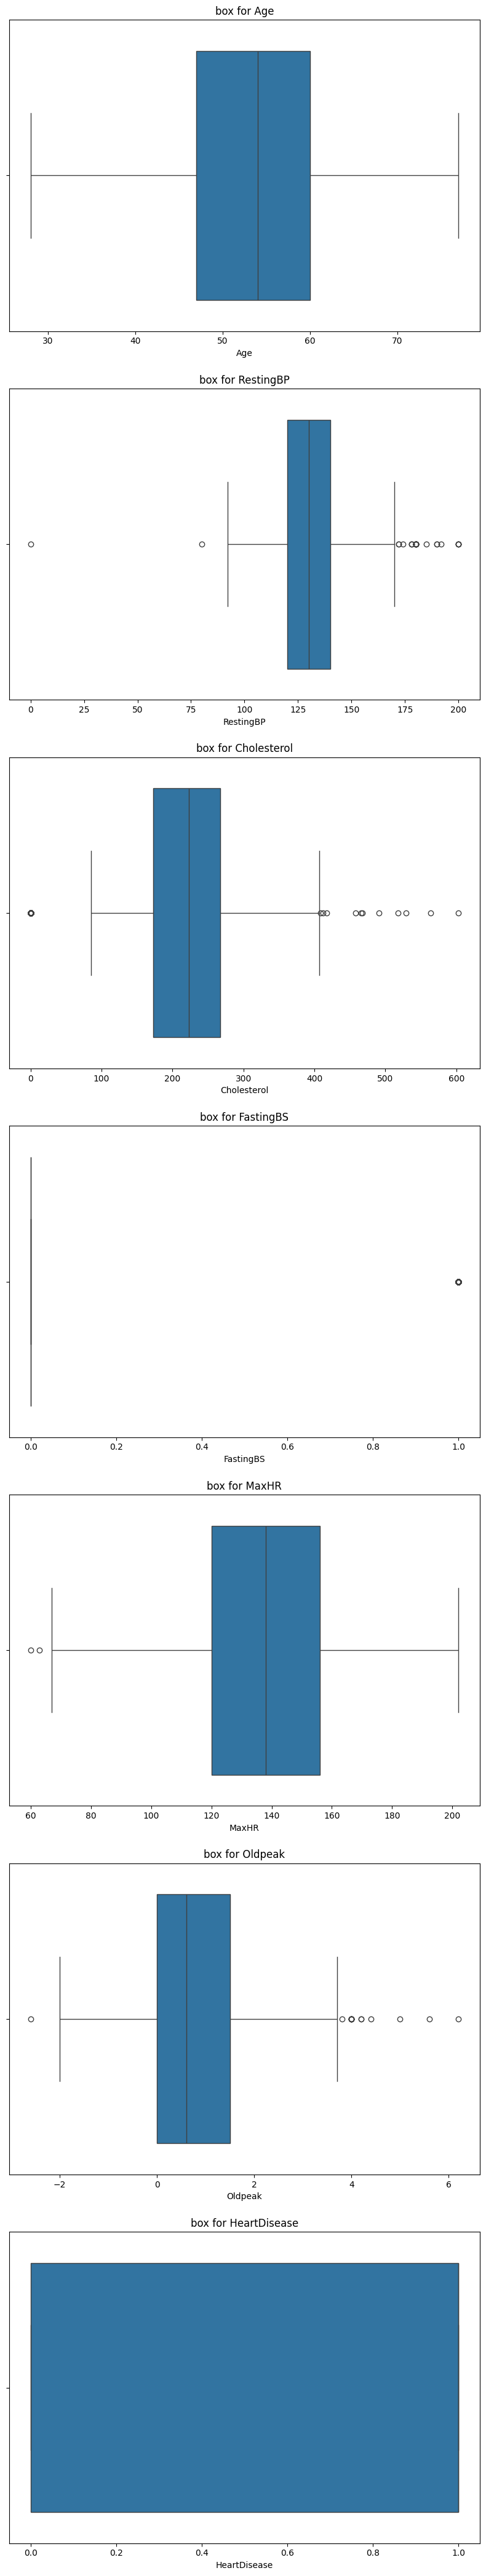

In [8]:
num_cols=dataset.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 6 * len(num_cols)))
axes = axes.flatten()
for i, column in enumerate(dataset[num_cols]):
    sns.boxplot(x=dataset[column], ax=axes[i])
    axes[i].set_title(f'box for {column}')
    axes[i].set_xlabel(column)

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

In [9]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR=Q3-Q1
dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
dataset.shape

<ipython-input-9-9df8fe02d4f6>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataset.quantile(0.25)
<ipython-input-9-9df8fe02d4f6>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataset.quantile(0.75)
<ipython-input-9-9df8fe02d4f6>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]


(588, 12)


Setelah dilakukan penilaian, ternyata tidak ada nilai yang hilang (missing values) dalam data dan tidak ada duplikasi data. Outlier dalam data juga sudah ditangani sehingga data saat ini berubah menjadi 588 Baris.
Namun, beberapa kolom dalam data masih bersifat kategorikal. Kolom-kolom data tersebut akan diubah menjadi numerik menggunakan label encoder dalam tahap pemrosesan data berikutnya.

Beberapa kolom data juga memiliki nilai yang cenderung besar. Ini akan ditangani dengan menggunakan Standard Scaler dalam tahap pemrosesan data selanjutnya.

## Tahap 4 - Univariate Analysis

### Distribusi Data-Data Categorical

Distribusi data berdasarkan jenis kelamin

   jumlah sampel  persentase
M            436        74.1
F            152        25.9


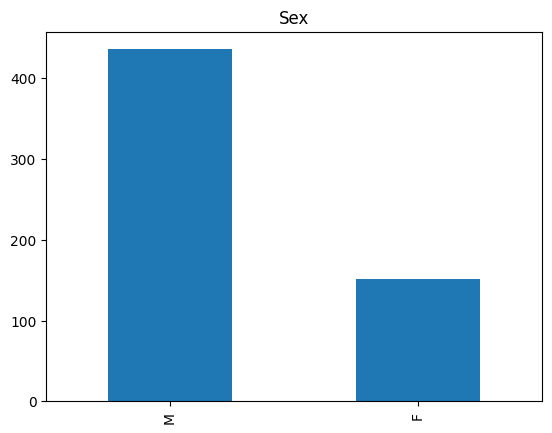

In [10]:
feature = 'Sex'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
count.plot(kind='bar', title=feature)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

Distribusi Data Berdasarkan ChestPainType

     jumlah sampel  persentase
ASY            278        47.3
ATA            144        24.5
NAP            137        23.3
TA              29         4.9


<Axes: title={'center': 'ChestPainType'}>

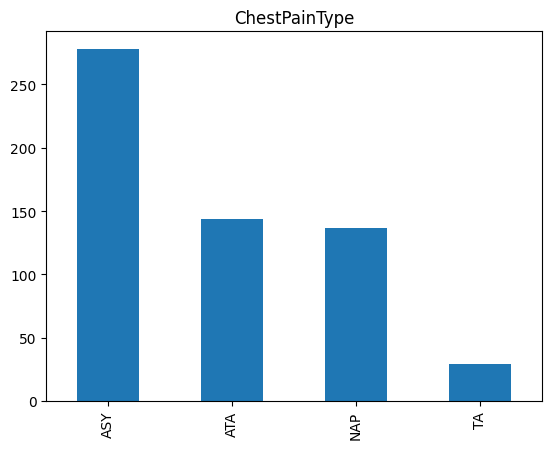

In [11]:
feature = 'ChestPainType'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Distribusi Berdasarkan RestingECG

        jumlah sampel  persentase
Normal            375        63.8
LVH               131        22.3
ST                 82        13.9


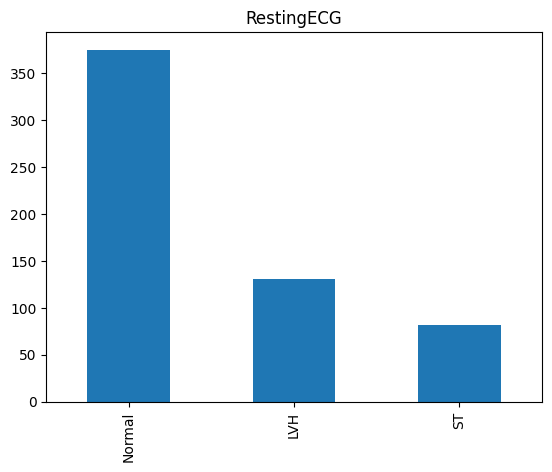

In [12]:
feature = 'RestingECG'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
count.plot(kind='bar', title=feature)
print(df)

Berdasarkan Exercise Angina

   jumlah sampel  persentase
0            381        64.8
1            207        35.2


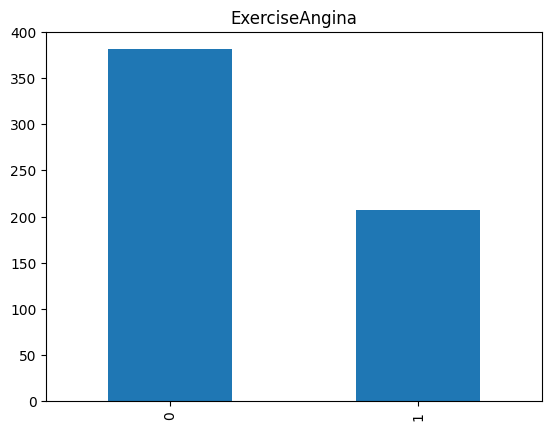

In [42]:
feature = 'ExerciseAngina'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
count.plot(kind='bar', title=feature)
print(df)

Berdasarkan ST_Slope

      jumlah sampel  persentase
Up              302        51.4
Flat            263        44.7
Down             23         3.9


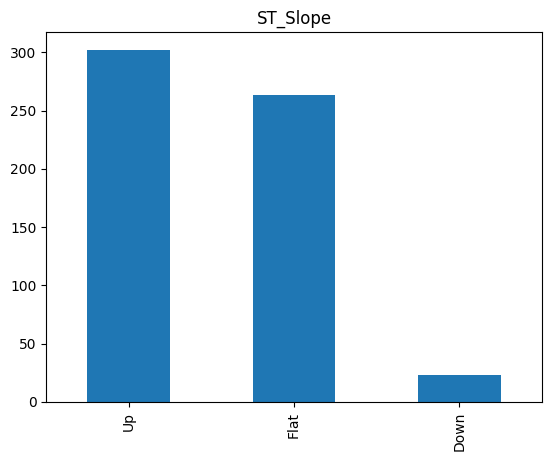

In [14]:
feature = 'ST_Slope'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
count.plot(kind='bar', title=feature)
print(df)

Distribusi Data Variabel Target

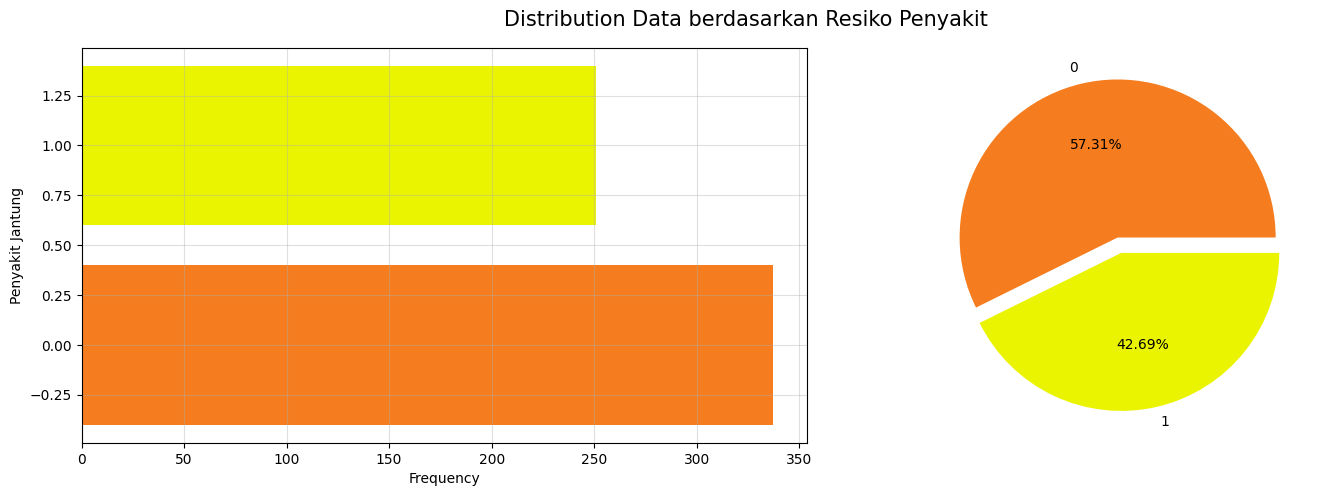

In [15]:
types = dataset['HeartDisease'].value_counts()
colors = ['#F57D1F','#EBF400']

# Create a two-subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart on the first subplot
ax1.barh(y=types.index, width=types.values, color=colors)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Penyakit Jantung')
ax1.grid(alpha=0.4)

# Pie chart on the second subplot
ax2.pie(types.values, labels=types.index, explode=([0.05] * len(types.index)), colors=colors, autopct='%.2f%%')

# Configure the overall layout
fig.suptitle('Distribution Data berdasarkan Resiko Penyakit', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

### Distribusi Numerical Features

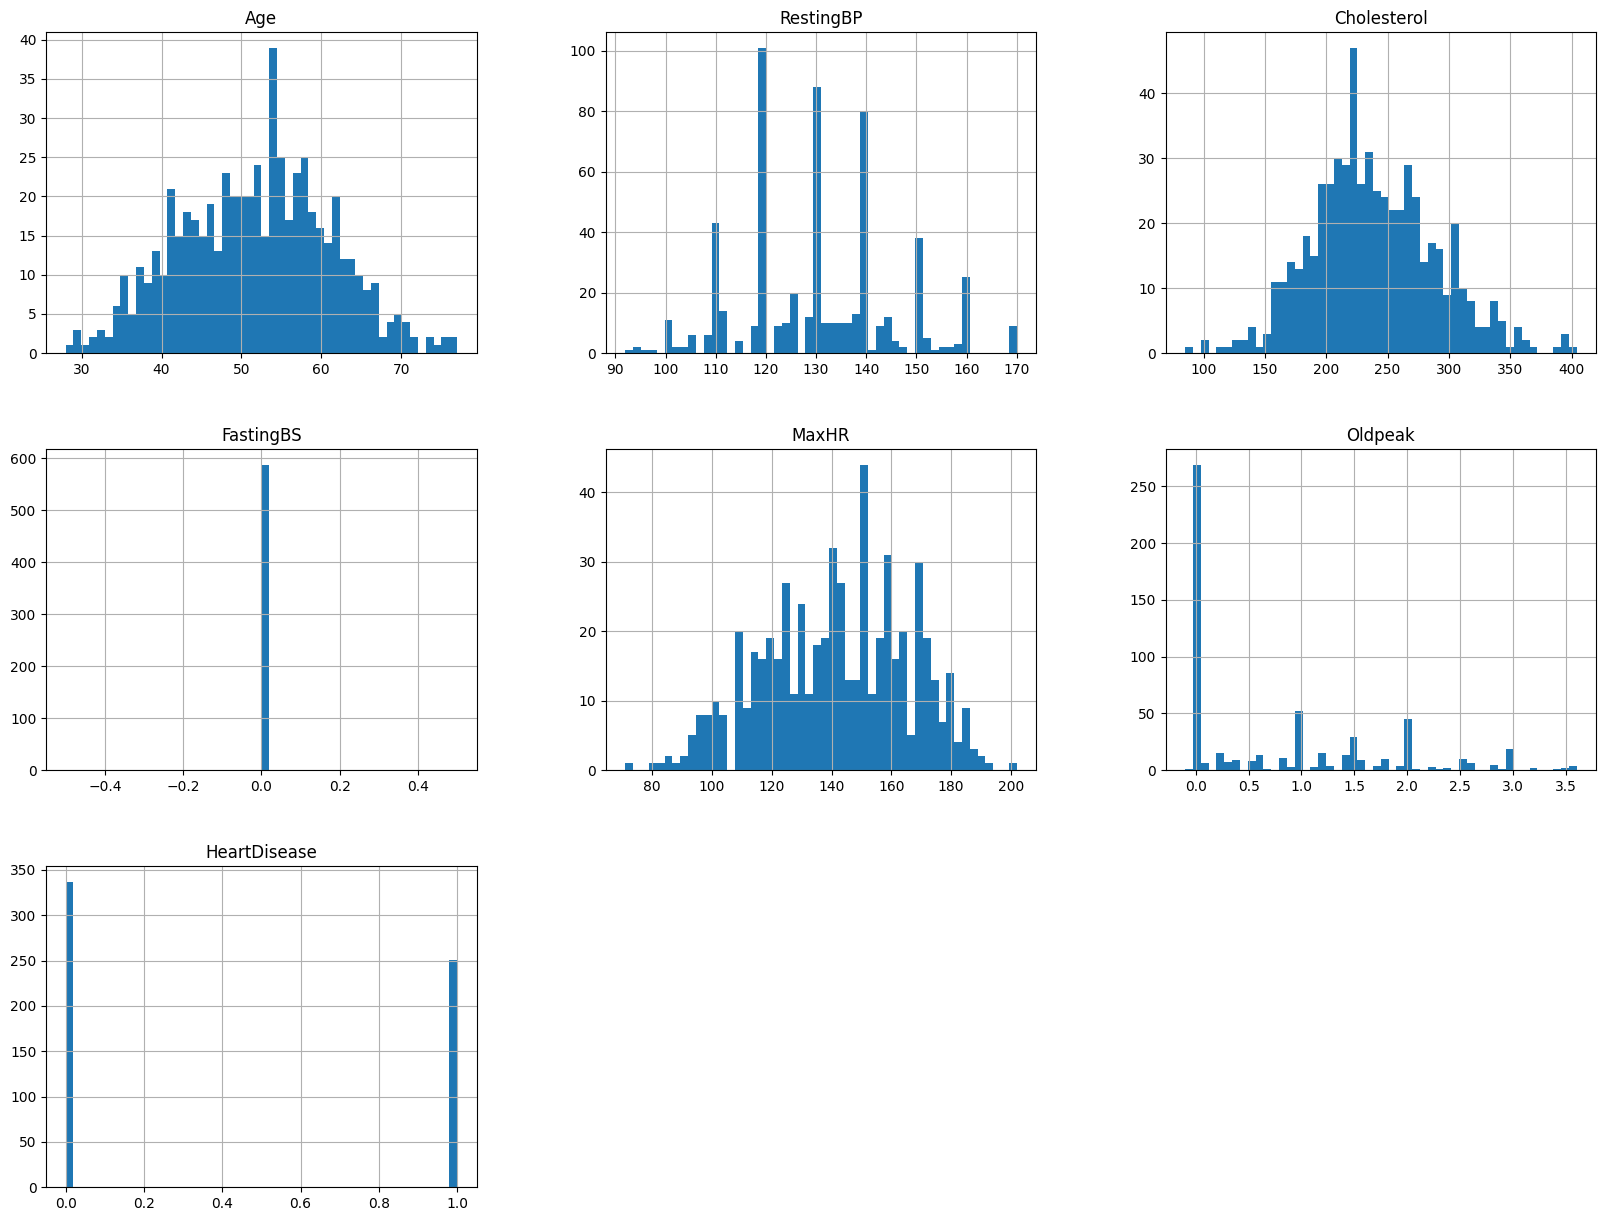

In [16]:
#membuat histogram untuk melihat distribusi data numerical
dataset.hist(bins=50,figsize=(20,15))
plt.show()

## Tahap 5 - Multivariate Analysis

### Analisa Terhadap Categorical Features
Dalam tahap ini, kita akan mengecek pengaruh masing masing
data ketegorikal terhadap berisiko atau tidaknya seseorang
dalam mengalami penyakit gagal jantung

<ipython-input-17-91e029f8fb85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=kolom, y="HeartDisease"  , kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
<ipython-input-17-91e029f8fb85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=kolom, y="HeartDisease"  , kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
<ipython-input-17-91e029f8fb85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=kolom, y="HeartDisease"  , kind="bar", dodge=False, height = 4, aspect = 3,  data=da

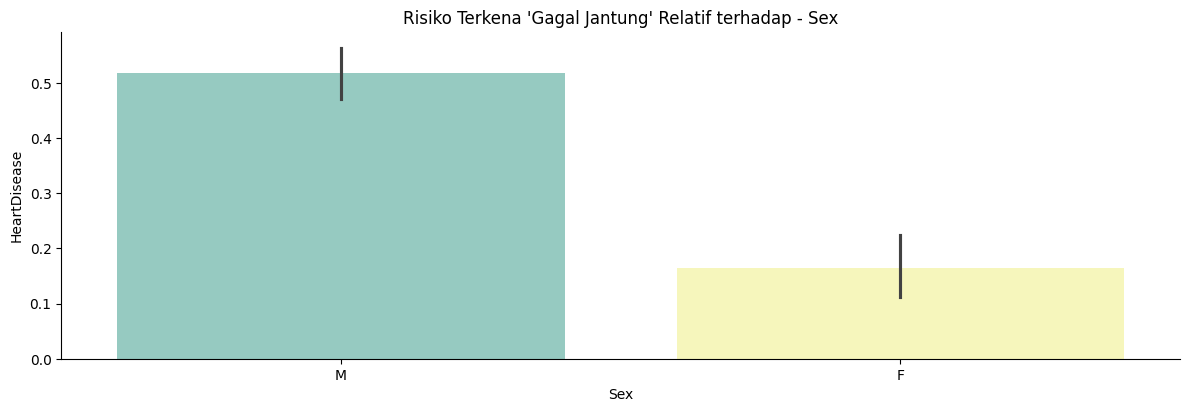

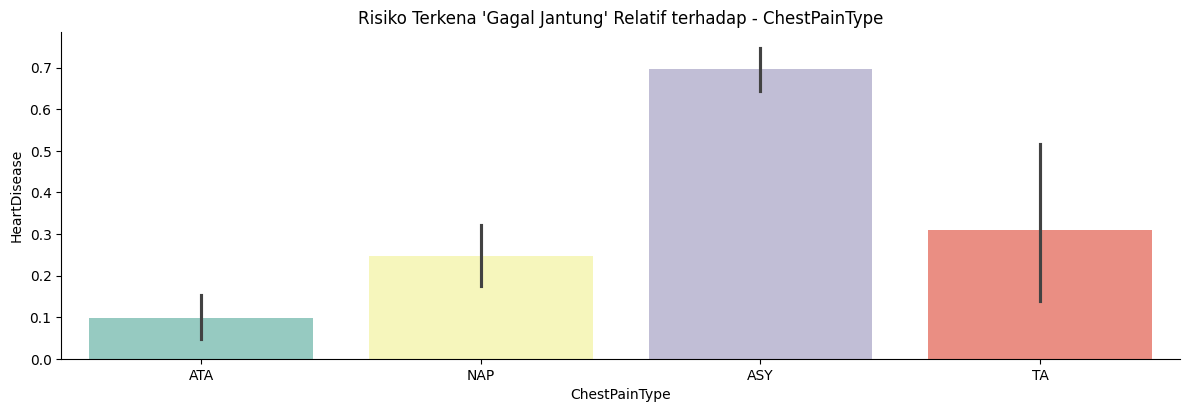

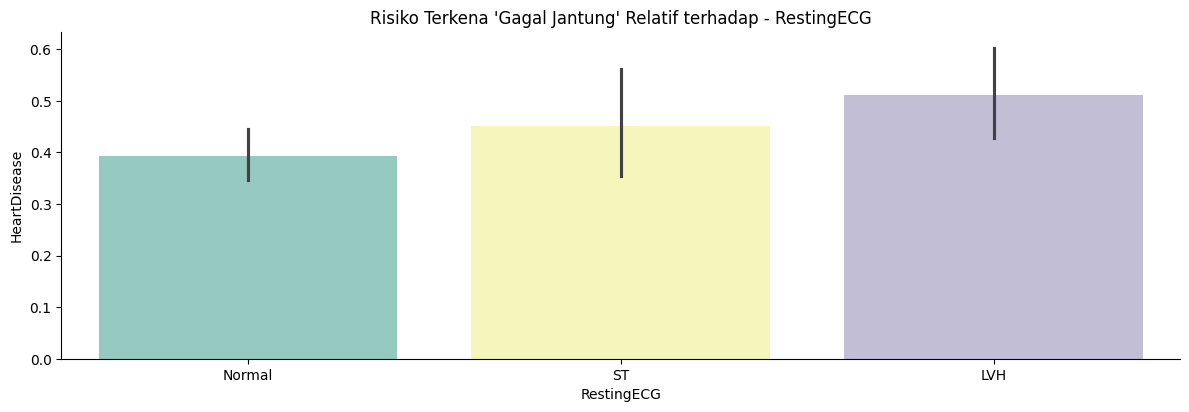

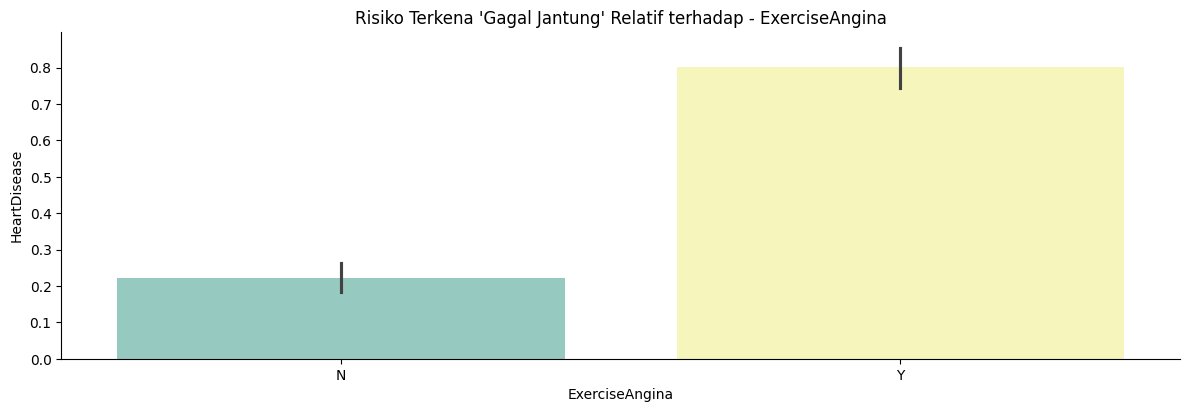

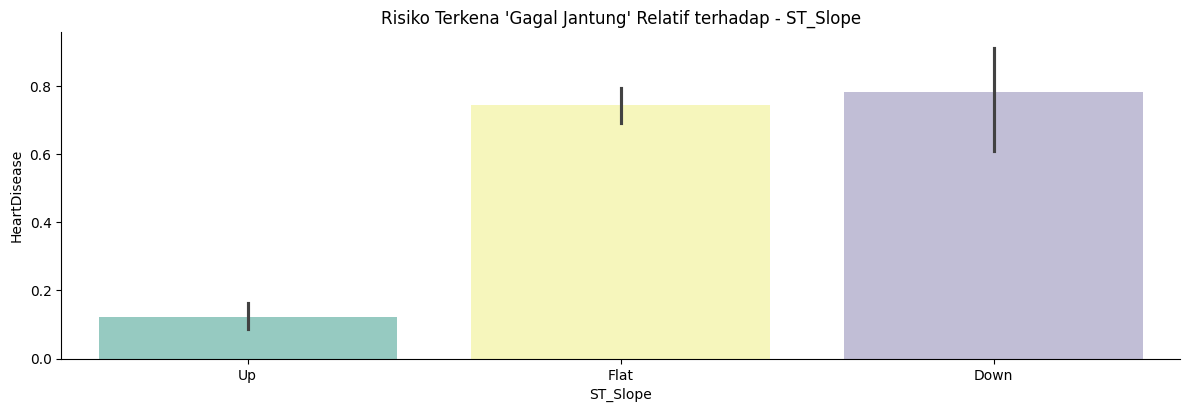

In [17]:
fitur_kategorikal = dataset.select_dtypes(include='object').columns.to_list()
for kolom in fitur_kategorikal:
  sns.catplot(x=kolom, y="HeartDisease"  , kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
  plt.title("Risiko Terkena 'Gagal Jantung' Relatif terhadap - {}".format(kolom))

### Pengecekan Korelasi Kategori Numerical

<ipython-input-18-9edc33d78c89>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

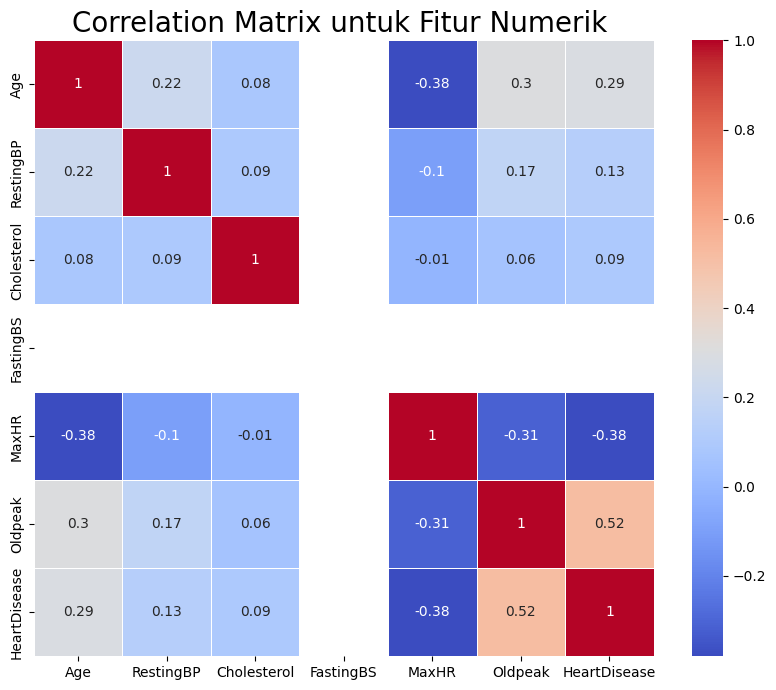

In [18]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Tahap 6 - Data Preparation

### Mengubah Fitur Kategorical menjadi numerical (angka) dengan bantuan label encoder

In [19]:
encoder = LabelEncoder()
fitur_kategorikal = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
kolom_kategorikal = dataset[fitur_kategorikal]
encoded_kategorikal = kolom_kategorikal.apply(encoder.fit_transform)
dataset[fitur_kategorikal] = encoded_kategorikal

In [20]:
#Cek Dataset setelah diberi labelencoder
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [21]:
#Cek Info Dataset setelah diberi labelencoder
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             588 non-null    int64  
 1   Sex             588 non-null    int64  
 2   ChestPainType   588 non-null    int64  
 3   RestingBP       588 non-null    int64  
 4   Cholesterol     588 non-null    int64  
 5   FastingBS       588 non-null    int64  
 6   RestingECG      588 non-null    int64  
 7   MaxHR           588 non-null    int64  
 8   ExerciseAngina  588 non-null    int64  
 9   Oldpeak         588 non-null    float64
 10  ST_Slope        588 non-null    int64  
 11  HeartDisease    588 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 59.7 KB


In [22]:
dataset.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.0,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,51.722789,0.741497,0.858844,130.375850,239.064626,0.0,0.916667,141.755102,0.352041,0.802211,1.474490,0.426871
std,9.542500,0.438185,0.940553,15.238699,50.738558,0.0,0.596578,24.144890,0.478013,0.961727,0.572834,0.495044
min,28.000000,0.000000,0.000000,92.000000,85.000000,0.0,0.000000,71.000000,0.000000,-0.100000,0.000000,0.000000
25%,44.750000,0.000000,0.000000,120.000000,205.000000,0.0,1.000000,124.000000,0.000000,0.000000,1.000000,0.000000
50%,52.000000,1.000000,1.000000,130.000000,234.000000,0.0,1.000000,142.000000,0.000000,0.300000,2.000000,0.000000
75%,58.000000,1.000000,2.000000,140.000000,272.000000,0.0,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,404.000000,0.0,2.000000,202.000000,1.000000,3.600000,2.000000,1.000000


## Standardisasi
langkah ini merupakan transformasi data agar skala data relatif sama atau mendekati distribusi normal agar lebih mudah diolah oleh algoritma

In [23]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'Oldpeak' , 'MaxHR']
scaler = MinMaxScaler()
scaler.fit(dataset[numerical_features])
dataset[numerical_features] = scaler.transform(dataset.loc[:, numerical_features])
dataset[numerical_features].head()

,Age,RestingBP,Cholesterol,Oldpeak,MaxHR
0,0.244898,0.615385,0.639498,0.027027,0.770992
1,0.428571,0.871795,0.297806,0.297297,0.648855
2,0.183673,0.487179,0.620690,0.027027,0.206107
3,0.408163,0.589744,0.404389,0.432432,0.282443
4,0.530612,0.743590,0.344828,0.027027,0.389313


In [24]:
dataset.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.0,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,0.484139,0.741497,0.858844,0.491998,0.482961,0.0,0.916667,0.540115,0.352041,0.243841,1.474490,0.426871
std,0.194745,0.438185,0.940553,0.195368,0.159055,0.0,0.596578,0.184312,0.478013,0.259926,0.572834,0.495044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.341837,0.000000,0.000000,0.358974,0.376176,0.0,1.000000,0.404580,0.000000,0.027027,1.000000,0.000000
50%,0.489796,1.000000,1.000000,0.487179,0.467085,0.0,1.000000,0.541985,0.000000,0.108108,2.000000,0.000000
75%,0.612245,1.000000,2.000000,0.615385,0.586207,0.0,1.000000,0.679389,1.000000,0.432432,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,0.0,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000


## Train Test Split
Langkah selanjutnya adalah membagi Dataset menjadi Data Latih dan Data Uji menggunakan Train_Test_Split

In [25]:
X = dataset.drop(["HeartDisease"], axis=1)
y = dataset['HeartDisease']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state=123)

In [26]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 588
Total # of sample in train dataset: 470
Total # of sample in test dataset: 118


## Tahap 7 - Analisa Model Machine Learning

### Analisa Menggunakan K-Nearest Neighbor

In [27]:
#Analisa menggunakan KNN dengan menggunakan jumlah K=3
Model_KNN = KNeighborsClassifier(n_neighbors=3)
Model_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
#Evaluasi Model terhadap Data Latih
y_train_pred = Model_KNN.predict(X_train)
KNN_acc_train = accuracy_score(y_train, y_train_pred)

In [29]:
print(f"Akurasi Train : {round(KNN_acc_train * 100,2)}%")

Akurasi Train : 90.43%


In [30]:
#Evaluasi Model terhadap Data Uji
y_test_pred = Model_KNN.predict(X_test)
KNN_acc_test = accuracy_score(y_test, y_test_pred)
print(f"Akurasi Test : {round(KNN_acc_test * 100,2)}%")

Akurasi Test : 77.12%


Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        72
           1       0.70      0.72      0.71        46

    accuracy                           0.77       118
   macro avg       0.76      0.76      0.76       118
weighted avg       0.77      0.77      0.77       118



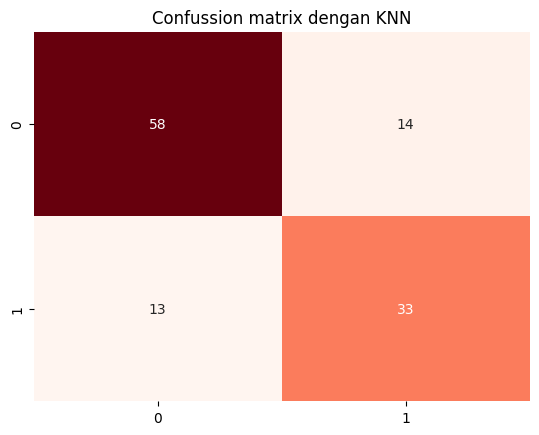

In [31]:
#Visualisasi Menggunakan Confussion Matrix
matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Reds', cbar=False,)
plt.title('Confussion matrix dengan KNN');
# Print classification report
print("Classification report: \n{}".format(classification_report(y_test, y_test_pred)))
KNN_precision = precision_score(y_test,y_test_pred)
KNN_recall = recall_score(y_test,y_test_pred)
KNN_f1 = f1_score(y_test,y_test_pred)

## Analisa Menggunakan Logistic Regression

In [32]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [33]:
#Evaluasi Model terhadap Data Latih
lr_train_pred = lr_model.predict(X_train)
lr_acc_train = accuracy_score(y_train, lr_train_pred)
print(f"Akurasi Train dengan LR : {round(lr_acc_train * 100,2)}%")

Akurasi Train dengan LR : 86.38%


In [34]:
#Evaluasi Model terhadap Data Uji
lr_test_pred = lr_model.predict(X_test)
lr_acc_test = accuracy_score(y_test, lr_test_pred)
print(f"Akurasi Train dengan LR : {round(lr_acc_test * 100,2)}%")

Akurasi Train dengan LR : 80.51%


Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        72
           1       0.74      0.76      0.75        46

    accuracy                           0.81       118
   macro avg       0.79      0.80      0.80       118
weighted avg       0.81      0.81      0.81       118



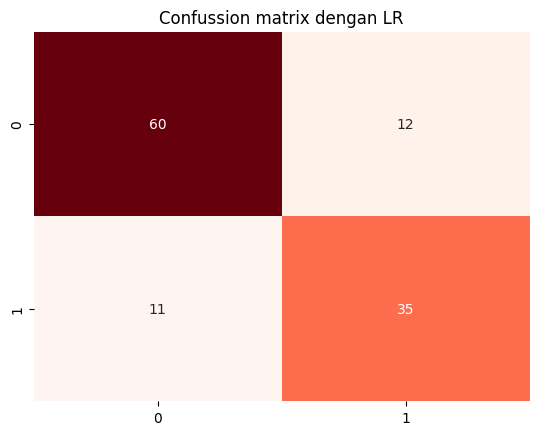

In [35]:
#Visualisasi Menggunakan Confussion Matrix
matrix = confusion_matrix(y_test, lr_test_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Reds', cbar=False,)
plt.title('Confussion matrix dengan LR');
# Print classification report
print("Classification report: \n{}".format(classification_report(y_test, lr_test_pred)))
lr_precision = precision_score(y_test,lr_test_pred)
lr_recall = recall_score(y_test,lr_test_pred)
lr_f1 = f1_score(y_test,lr_test_pred)

## Analisa Menggunakan Decision Tree

In [36]:
decisiontreemodel = DecisionTreeClassifier()
decisiontreemodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
#Evaluasi Model terhadap Data Latih
tree_train_pred = decisiontreemodel.predict(X_train)
tree_acc_train = accuracy_score(y_train, tree_train_pred)
print(f"Akurasi Train dengan Decision Tree : {round(tree_acc_train * 100,2)}%")

Akurasi Train dengan Decision Tree : 100.0%


In [38]:
#Evaluasi Model terhadap Data Uji
tree_test_pred = decisiontreemodel.predict(X_test)
tree_acc_test = accuracy_score(y_test, tree_test_pred)
print(f"Akurasi Test dengan Decision Tree : {round(tree_acc_test * 100,2)}%")

Akurasi Test dengan Decision Tree : 74.58%


Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        72
           1       0.67      0.67      0.67        46

    accuracy                           0.75       118
   macro avg       0.73      0.73      0.73       118
weighted avg       0.75      0.75      0.75       118



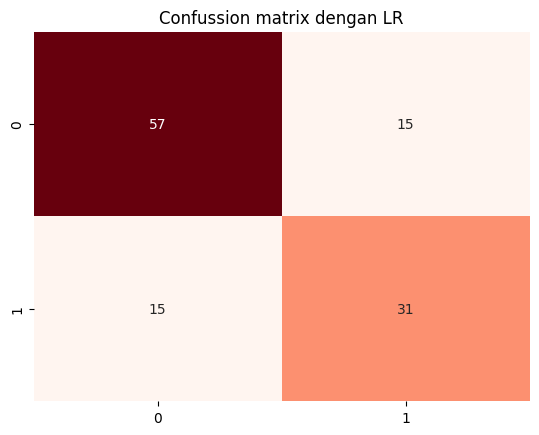

In [39]:
#Visualisasi Menggunakan Confussion Matrix
matrix = confusion_matrix(y_test, tree_test_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Reds', cbar=False,)
plt.title('Confussion matrix dengan LR');
# Print classification report
print("Classification report: \n{}".format(classification_report(y_test, tree_test_pred)))
tree_precision = precision_score(y_test,tree_test_pred)
tree_recall = recall_score(y_test,tree_test_pred)
tree_f1 = f1_score(y_test,tree_test_pred)

## Kesimpulan

Berikut merupakan perbandingan Accuracy Train, Accuracy Test, Precission, Recall, dan F1 Score untuk mengukur kinerja masing masing Algoritma

In [41]:
models = pd.DataFrame({
    'Model':
    ['K-Nearest Neighbor', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Test' :
    [KNN_acc_test, lr_acc_test, tree_acc_test],
    'Accuracy Train' :
    [KNN_acc_train, lr_acc_train, tree_acc_train],
    'Precision' :
    [KNN_precision,lr_precision, tree_precision],
    'Recall' :
    [KNN_recall,lr_recall,tree_recall],
    'F1 Score' :
    [KNN_f1, lr_f1,tree_f1]
})
models

,Model,Accuracy Test,Accuracy Train,Precision,Recall,F1 Score
0,K-Nearest Neighbor,0.771186,0.904255,0.702128,0.717391,0.709677
1,Logistic Regression,0.805085,0.863830,0.744681,0.760870,0.752688
2,Decision Tree,0.745763,1.000000,0.673913,0.673913,0.673913
